In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lung_cancer/dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [2]:
df.columns.to_list()

['id',
 'age',
 'gender',
 'country',
 'diagnosis_date',
 'cancer_stage',
 'family_history',
 'smoking_status',
 'bmi',
 'cholesterol_level',
 'hypertension',
 'asthma',
 'cirrhosis',
 'other_cancer',
 'treatment_type',
 'end_treatment_date',
 'survived']

In [3]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [4]:
print(num_cols)

['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']


In [5]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [6]:
print(cat_cols)

['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']


In [7]:
df.shape

(890000, 17)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


***`EDA - Exploratory data Analysis`***

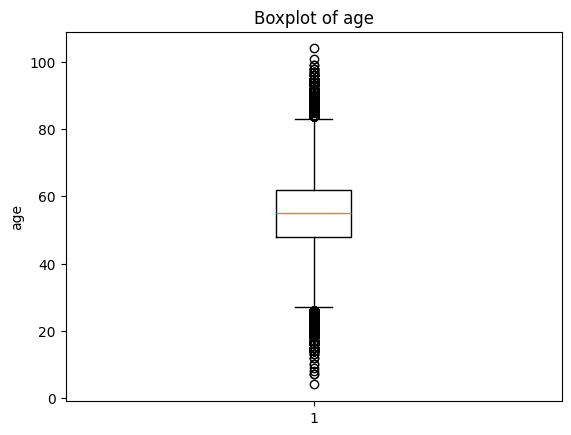

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(df['age'])
plt.title("Boxplot of age")
plt.ylabel("age")
plt.show()

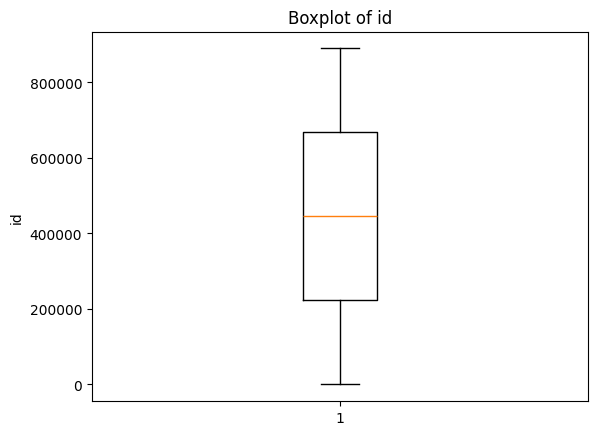

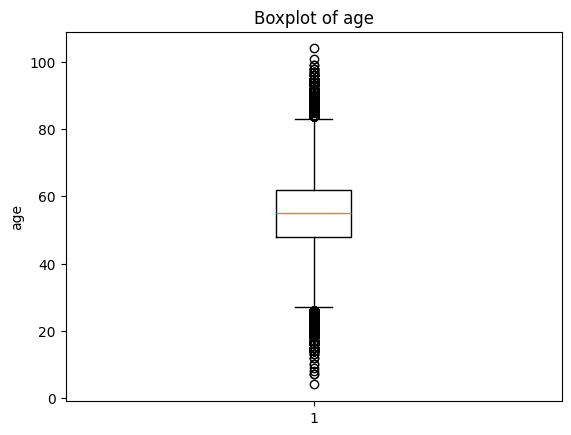

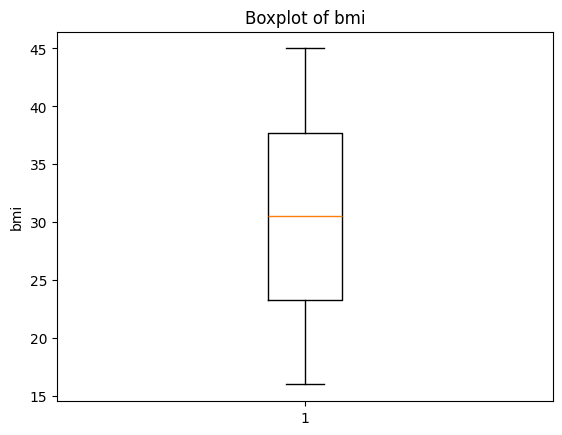

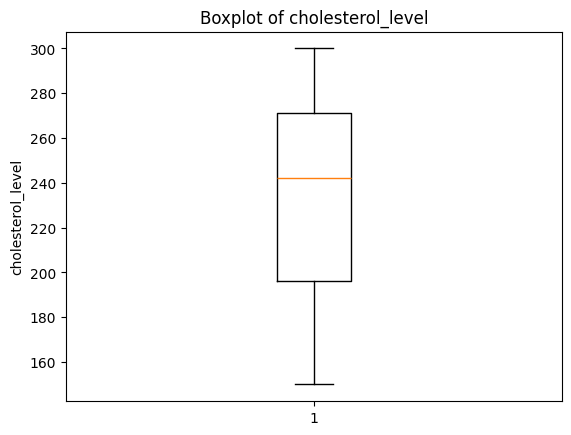

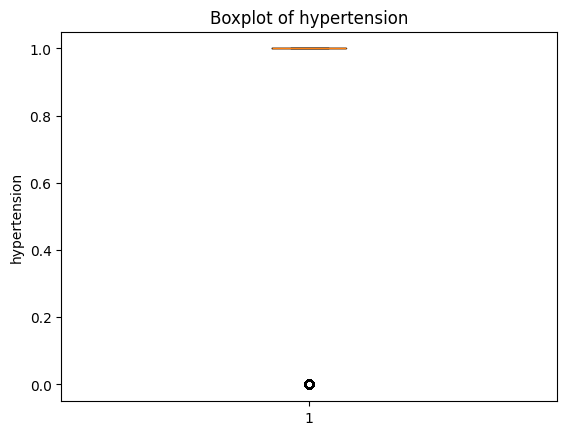

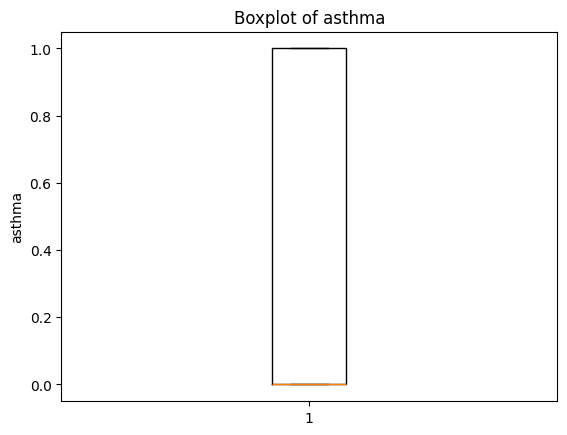

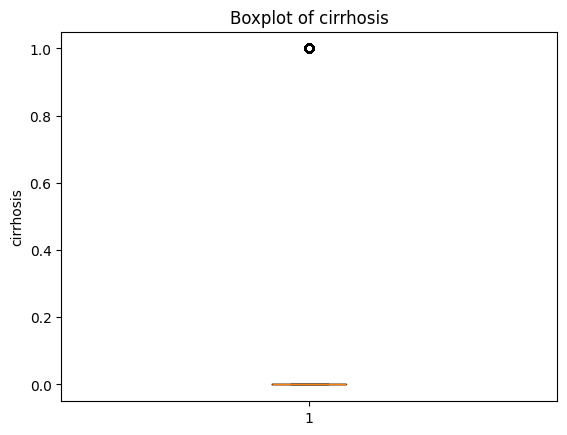

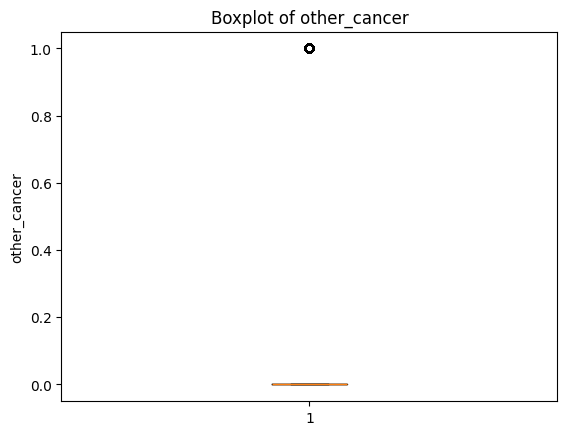

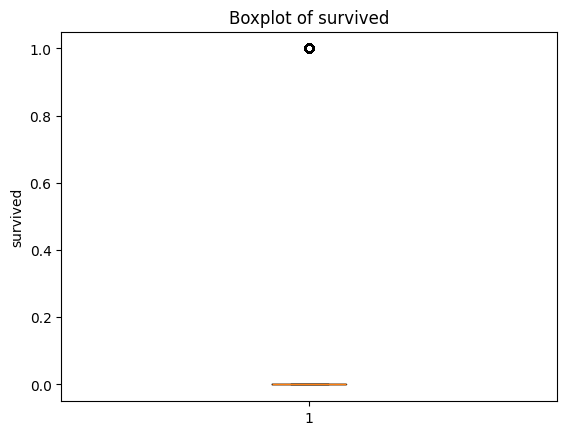

In [11]:
for col in num_cols:
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.ylabel(col)
  plt.show()

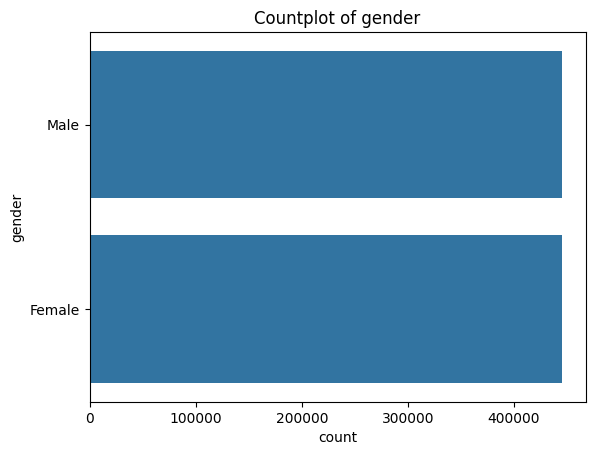

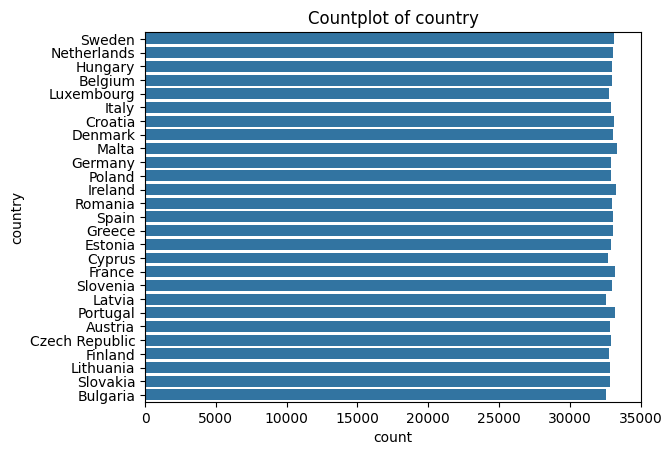

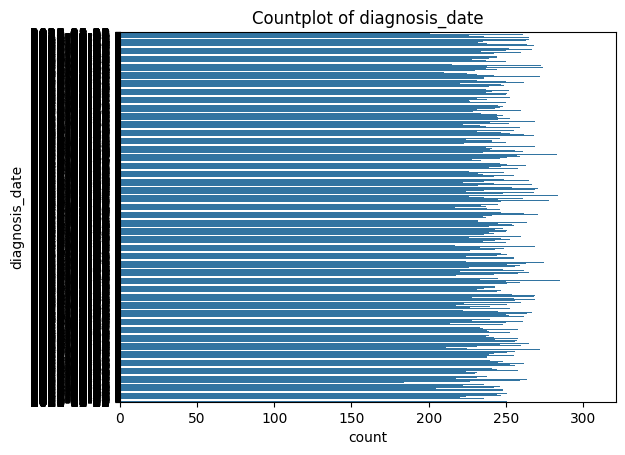

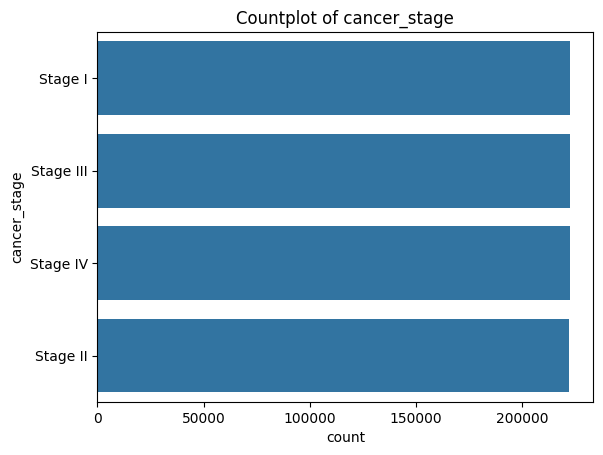

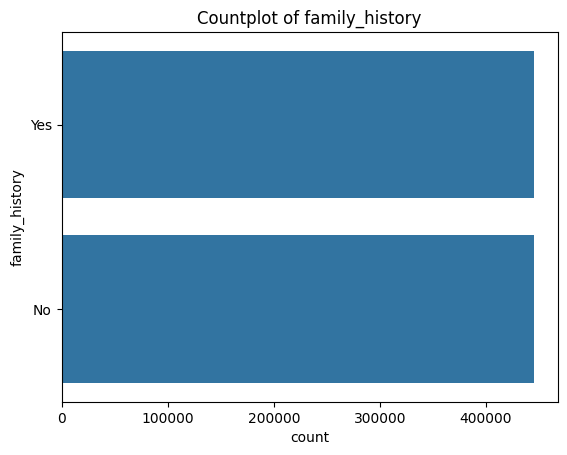

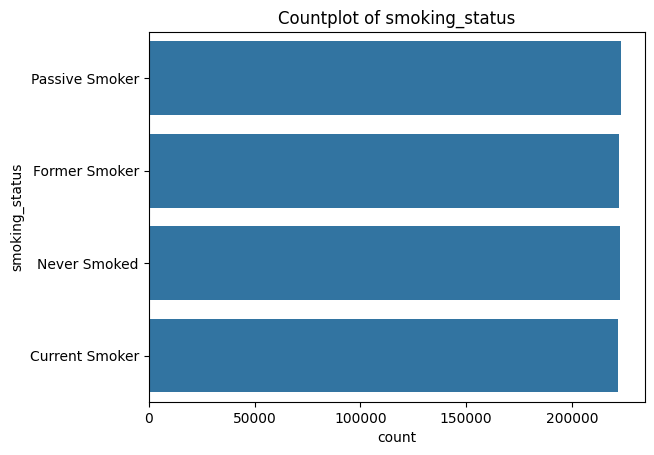

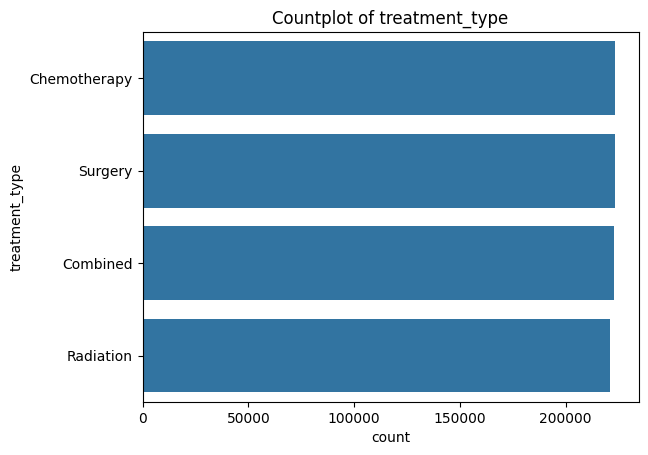

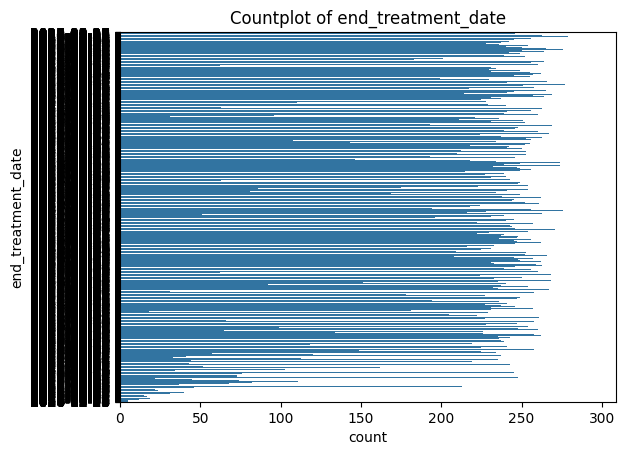

In [12]:
for col in cat_cols:
  sns.countplot(df[col])
  plt.title(f"Countplot of {col}")
  plt.ylabel(col)
  plt.show()

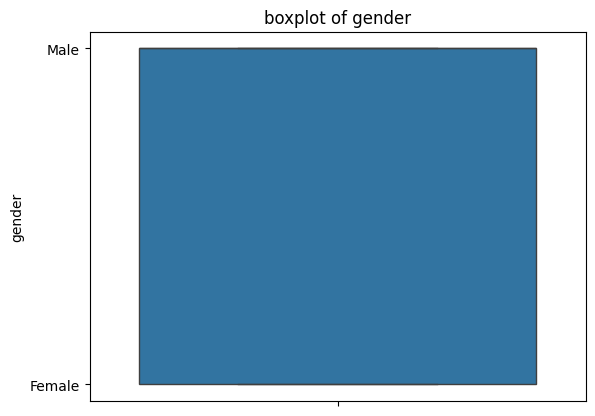

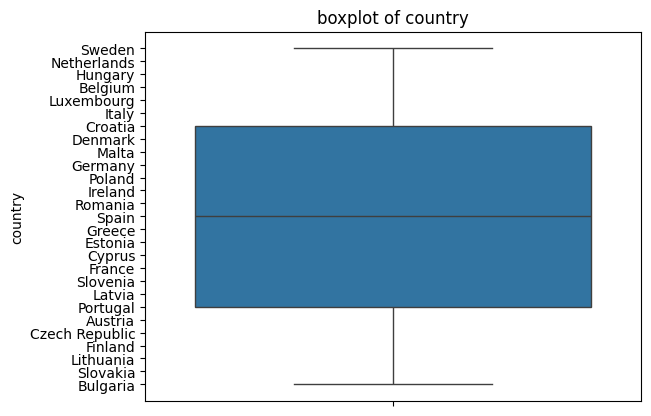

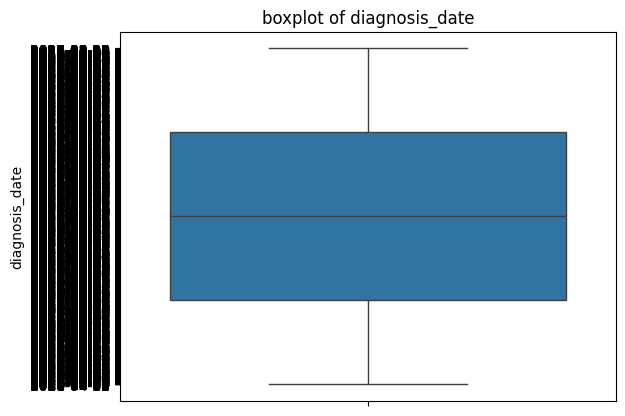

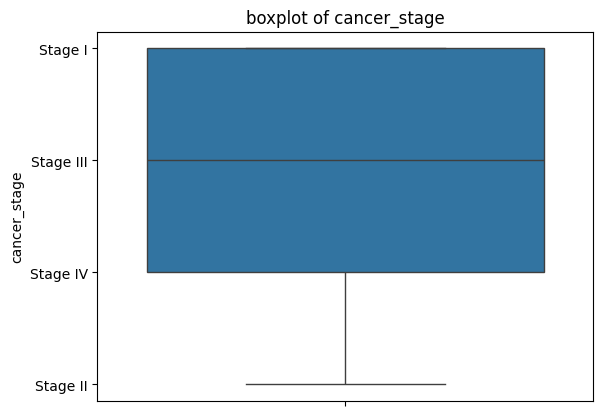

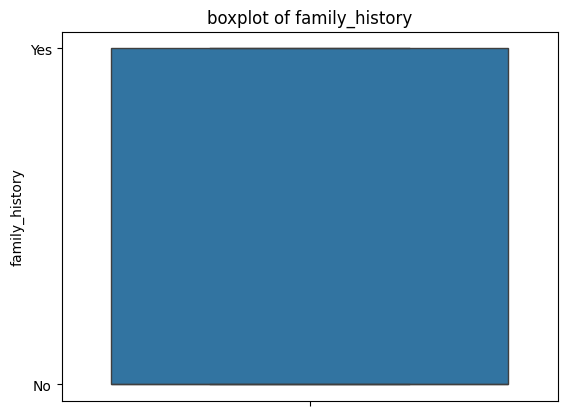

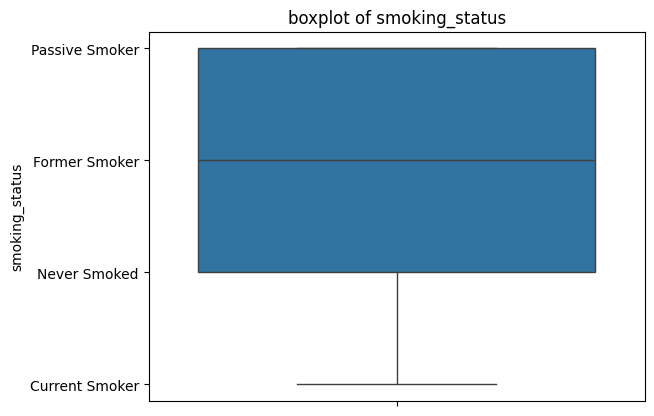

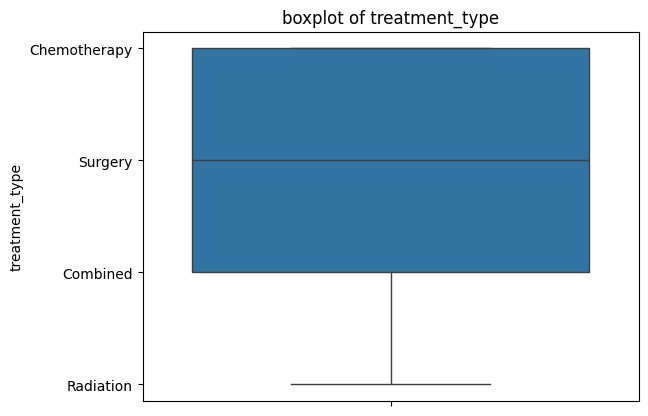

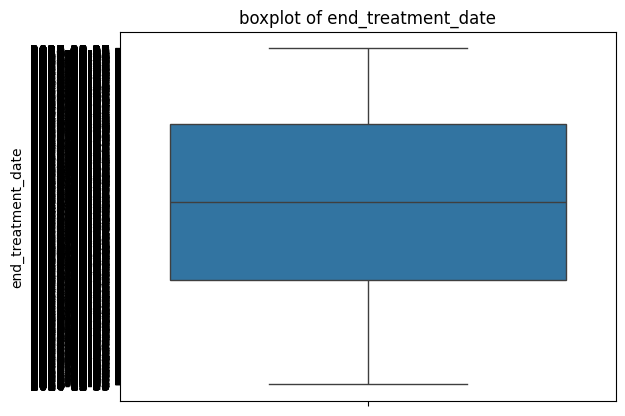

In [13]:
for col in cat_cols:
  sns.boxplot(df[col])
  plt.title(f"boxplot of {col}")
  plt.ylabel(col)
  plt.show()

In [14]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [16]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df['gender'].unique())

[1 0]


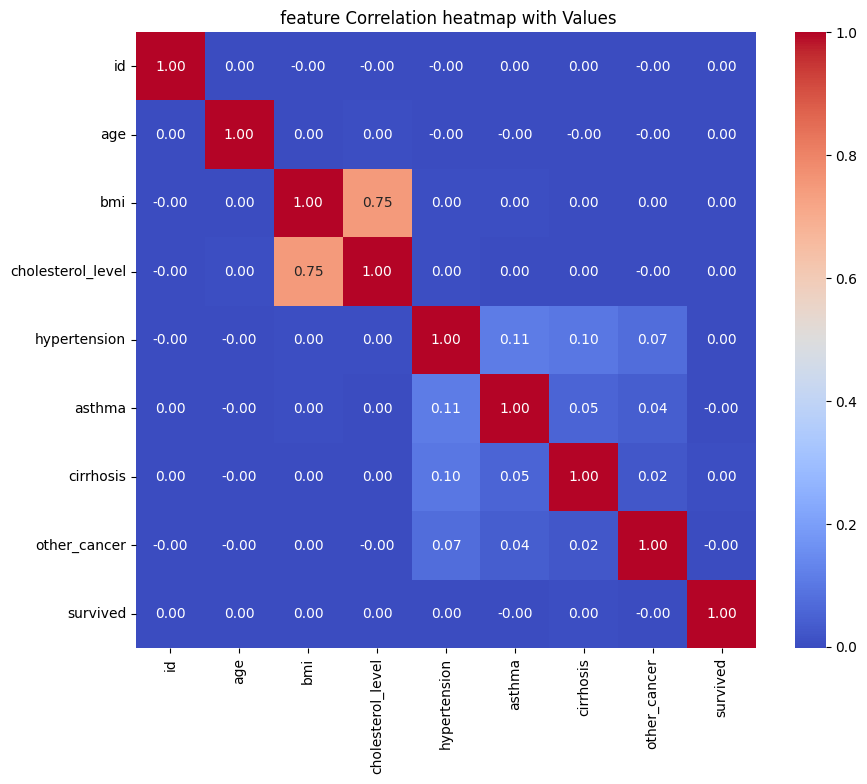

In [18]:
corr_metrix = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_metrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title(" feature Correlation heatmap with Values")
plt.show()

In [19]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,0,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,0,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,0,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,0,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,0,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,0,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [20]:

le = LabelEncoder()
df['family_history'] = le.fit_transform(df['family_history'])
print(df['family_history'].unique())

[1 0]


In [21]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,Sweden,2016-04-05,Stage I,1,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,0,Netherlands,2023-04-20,Stage III,1,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,0,Hungary,2023-04-05,Stage III,1,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,0,Belgium,2016-02-05,Stage I,0,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,Stage I,0,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,Malta,2022-07-01,Stage IV,0,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,0,Cyprus,2015-09-27,Stage II,1,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,0,Estonia,2016-03-27,Stage III,1,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,0,Slovakia,2015-12-22,Stage IV,1,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [23]:
le = LabelEncoder()
df['cancer_stage'] = le.fit_transform(df['cancer_stage'])
print(df['cancer_stage'].unique())

[0 2 3 1]


In [26]:
df[cat_cols].value_counts()

gender  country  diagnosis_date  cancer_stage  family_history  smoking_status  treatment_type  end_treatment_date
1       Italy    2018-04-28      1             0               Current Smoker  Radiation       2019-06-24            2
        Germany  2017-10-26      2             1               Passive Smoker  Combined        2018-12-29            2
        Malta    2018-08-04      3             0               Never Smoked    Chemotherapy    2019-03-29            2
0       Ireland  2016-12-03      1             1               Never Smoked    Combined        2018-11-16            2
        Germany  2022-03-06      0             1               Passive Smoker  Radiation       2023-07-16            2
                                                                                                                    ..
        Malta    2014-09-22      2             0               Former Smoker   Chemotherapy    2015-10-24            1
                 2014-09-23      3             0               Passive Smoker  Radiation       2015-11-23            1
                                               1               Current Smoker  Radiation       2015-09-26            1
                 2014-09-24      0             0               Current Smoker  Combined        2016-06-24            1
                 2014-09-21      0             0               Never Smoked    Combined        2016-02-27            1
Name: count, Length: 889966, dtype: int64

In [24]:
df['cancer_stage']

,cancer_stage
0,0
1,2
2,2
3,0
4,0
...,...
889995,3
889996,1
889997,2
889998,3


In [27]:
cols_to_encode= ["treatment_type","family_history","smoking_status"]

le = LabelEncoder()
for col in cols_to_encode:
  df[col] = le.fit_transform(df[col].astype(str))
  print(df[cols_to_encode].head())

   treatment_type  family_history  smoking_status
0               0               1  Passive Smoker
1               3               1  Passive Smoker
2               1               1   Former Smoker
3               0               0  Passive Smoker
4               1               0  Passive Smoker
   treatment_type  family_history  smoking_status
0               0               1  Passive Smoker
1               3               1  Passive Smoker
2               1               1   Former Smoker
3               0               0  Passive Smoker
4               1               0  Passive Smoker
   treatment_type  family_history  smoking_status
0               0               1               3
1               3               1               3
2               1               1               1
3               0               0               3
4               1               0               3


In [29]:
df['smoking_status'].unique()

array([3, 1, 2, 0])

In [28]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,Sweden,2016-04-05,0,1,3,29.4,199,0,0,1,0,0,2017-09-10,0
1,2,50.0,0,Netherlands,2023-04-20,2,1,3,41.2,280,1,1,0,0,3,2024-06-17,1
2,3,65.0,0,Hungary,2023-04-05,2,1,1,44.0,268,1,1,0,0,1,2024-04-09,0
3,4,51.0,0,Belgium,2016-02-05,0,0,3,43.0,241,1,1,0,0,0,2017-04-23,0
4,5,37.0,1,Luxembourg,2023-11-29,0,0,3,19.7,178,0,0,0,0,1,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,Malta,2022-07-01,3,0,3,44.8,243,1,1,1,0,2,2023-02-23,0
889996,889997,62.0,0,Cyprus,2015-09-27,1,1,1,21.6,240,0,0,0,0,3,2017-06-19,0
889997,889998,48.0,0,Estonia,2016-03-27,2,1,2,38.6,242,1,0,0,0,1,2017-01-23,1
889998,889999,67.0,0,Slovakia,2015-12-22,3,1,1,18.6,194,1,1,0,0,0,2017-12-12,0


In [44]:
drop_cols = ["country","diagnosis_date","end_treatment_date"]
df.drop(columns=drop_cols,errors='ignore',inplace=True)

In [45]:
upd_numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [46]:
print(upd_numeric_cols)

['id', 'age', 'gender', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'survived']


<Axes: >

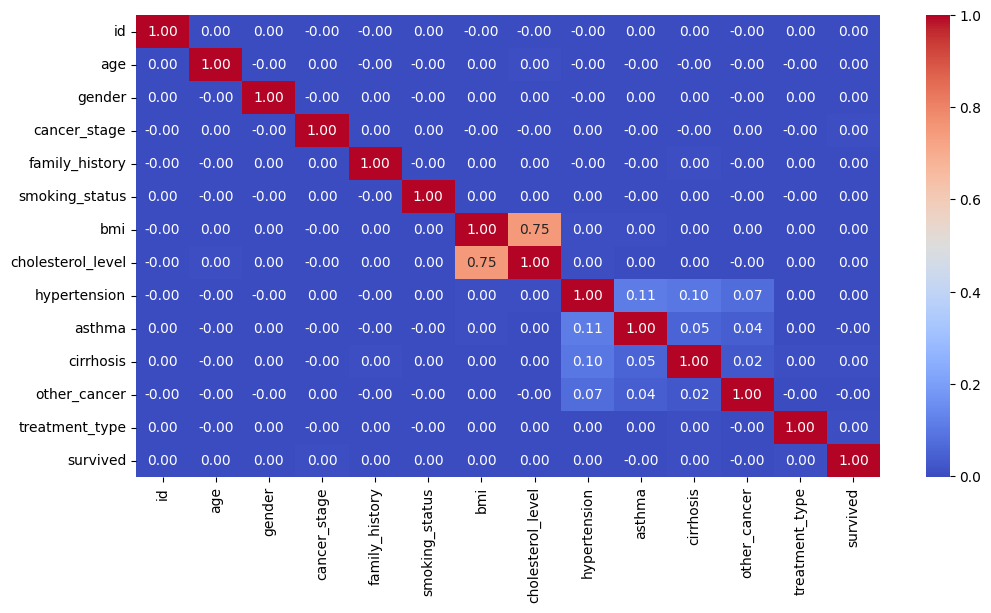

In [47]:
corr_metrix = df[upd_numeric_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_metrix,annot=True,cmap="coolwarm",fmt=".2f")

In [48]:
df

,id,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,1,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0
1,2,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1
2,3,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0
3,4,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0
4,5,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,3,0,3,44.8,243,1,1,1,0,2,0
889996,889997,62.0,0,1,1,1,21.6,240,0,0,0,0,3,0
889997,889998,48.0,0,2,1,2,38.6,242,1,0,0,0,1,1
889998,889999,67.0,0,3,1,1,18.6,194,1,1,0,0,0,0


In [49]:
df.to_csv("prep_dataset.csv",index=False)